## Domanda Teorica

Descrivere con proprie parole (not CHAT-GPT oriented) il concetto di time series forecasting e cosa lo differenzia dai problemi ri regressione standard, fornendo esempi ed applicazioni/limiti.


Risposta


Il time series forecasting è una tecnica di analisi per prevedere il valore futuro di una variabile in base ai dati storici.
La principale differenza tra il time series forecasting e la regressione standard è nella natura dei dati analizzati. Nella regressione standard, i dati sono indipendenti tra loro e non esiste un ordine temporale specifico. Nel time series forecasting i dati sono organizzati temporalmente, e l'obiettivo è prevedere i valori futuri in base alle informazioni passate.

Le differenze sono principalmente nella dipendenza temporale. Nel time series forecasting, l'ordine temporale delle osservazioni è fondamentale e la colonna index contiene i datetime fondamentali per l'analisi temporale. Nel caso della regressione standard, invece, l'ordine temporale non è rilevante.

Alcuni esempi di applicazione pratica sono:

Previsione delle vendite: Prevedere le vendite future in base ai dati storici.
Previsione del traffico: Prevedere i livelli di traffico futuri in base ai dati storici del traffico.

## Fake news Detection

In [18]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Fake.csv
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/True.csv
path_fake = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Fake.csv'
path_true = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/True.csv'

In [92]:
import pandas as pd
import numpy as np
import joblib

import warnings
warnings.filterwarnings('ignore')

In [47]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

df_fake["class"] = 0 #fake
df_true["class"] = 1 #real

df_marge = pd.concat([df_fake, df_true], axis =0 )
df = df_marge.drop(["title", "subject","date"], axis = 1)
df = df.sample(frac = 1).reset_index(drop=True)
df


,text,class
0,WASHINGTON (Reuters) - President Donald Trump ...,1
1,"Canadian Prime Minister Justin Trudeau has, li...",0
2,HONG KONG/BEIJING (Reuters) - China said on Th...,1
3,There are so many reasons for this little cowa...,0
4,"While it s often difficult to notice, Joe Scar...",0
...,...,...
44893,Donald Trump is getting nothing but bad news w...,0
44894,BRASILIA (Reuters) - Brazilian President Miche...,1
44895,Here we go again 25 years after the Gulf War w...,0
44896,"HAVANA (Reuters) - Jill Biden, wife of U.S. Vi...",1


In [48]:
patterns = {
            r'\d+': '',             # remove digits (numeri)
            r'[^\w\s]': '',         # remove punteggiatura e simboli ...,'@!£$%
            r'\b\w{1,2}\b':'',      # remove all token less than2 characters
            r'(http|www)[^\s]+':'', # remove website
            r'\s+': ' '             # sostituisce tutti i multipli spazi con uno spazio
            }

In [49]:
def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement)
        df[column] = df[column].str.lower() # applica il lower
    return df

In [50]:
df

,text,class
0,WASHINGTON (Reuters) - President Donald Trump ...,1
1,"Canadian Prime Minister Justin Trudeau has, li...",0
2,HONG KONG/BEIJING (Reuters) - China said on Th...,1
3,There are so many reasons for this little cowa...,0
4,"While it s often difficult to notice, Joe Scar...",0
...,...,...
44893,Donald Trump is getting nothing but bad news w...,0
44894,BRASILIA (Reuters) - Brazilian President Miche...,1
44895,Here we go again 25 years after the Gulf War w...,0
44896,"HAVANA (Reuters) - Jill Biden, wife of U.S. Vi...",1


In [51]:
df['label'] = df['class'].replace({1: 'true', 0: 'fake'})
df = df.drop('class', axis=1)
df

,text,label
0,WASHINGTON (Reuters) - President Donald Trump ...,true
1,"Canadian Prime Minister Justin Trudeau has, li...",fake
2,HONG KONG/BEIJING (Reuters) - China said on Th...,true
3,There are so many reasons for this little cowa...,fake
4,"While it s often difficult to notice, Joe Scar...",fake
...,...,...
44893,Donald Trump is getting nothing but bad news w...,fake
44894,BRASILIA (Reuters) - Brazilian President Miche...,true
44895,Here we go again 25 years after the Gulf War w...,fake
44896,"HAVANA (Reuters) - Jill Biden, wife of U.S. Vi...",true


In [52]:
clean_column(df, 'text', patterns)

,text,label
0,washington reuters president donald trump outl...,true
1,canadian prime minister justin trudeau has lik...,fake
2,hong kongbeijing reuters china said thursday h...,true
3,there are many reasons for this little coward ...,fake
4,while often difficult notice joe scarborough o...,fake
...,...,...
44893,donald trump getting nothing but bad news when...,fake
44894,brasilia reuters brazilian president michel te...,true
44895,here again years after the gulf war back but w...,fake
44896,havana reuters jill biden wife vice president ...,true


In [59]:
df['label'].value_counts()

fake    23481
true    21417
Name: label, dtype: int64

In [60]:
somma_valori_nulli = df.isnull().sum()
somma_valori_nulli

text     0
label    0
dtype: int64

In [61]:
df.to_csv('csv_clean.csv', index=False)

In [62]:
text_true = list(map(str, df[df['label']=='true']['text']))
text_fake = list(map(str, df[df['label']=='fake']['text']))

text_true = ''.join(text_true)
text_fake = ''.join(text_fake)

(-0.5, 649.5, 299.5, -0.5)

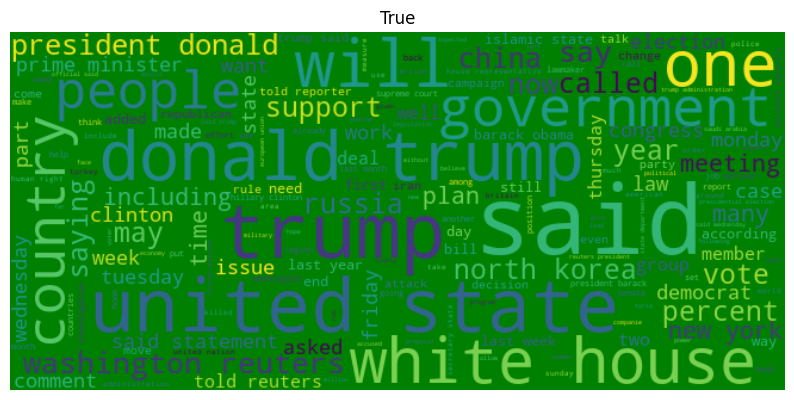

In [63]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color='green', width=650, height=300,
                      max_words=180, contour_width=3,
                      max_font_size=80, colormap='viridis',
                      stopwords=STOPWORDS, random_state=667)

wordcloud.generate(text_true)

plt.figure(figsize=(10,6))
plt.title('True')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 649.5, 299.5, -0.5)

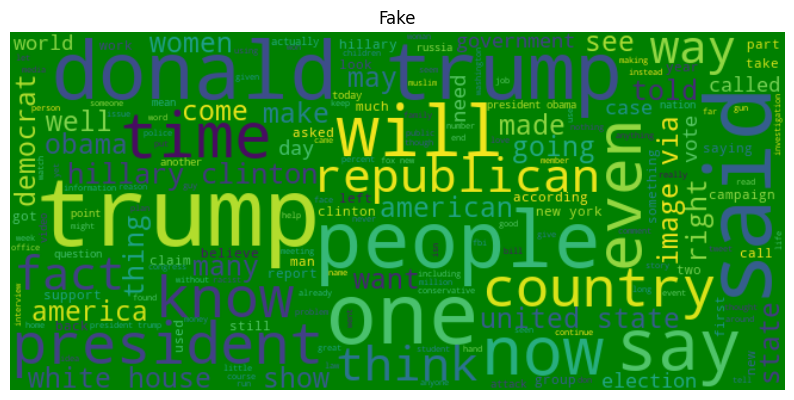

In [64]:
wordcloud.generate(text_fake)

plt.figure(figsize=(10,6))
plt.title('Fake')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [65]:
df

,text,label
0,washington reuters president donald trump outl...,true
1,canadian prime minister justin trudeau has lik...,fake
2,hong kongbeijing reuters china said thursday h...,true
3,there are many reasons for this little coward ...,fake
4,while often difficult notice joe scarborough o...,fake
...,...,...
44893,donald trump getting nothing but bad news when...,fake
44894,brasilia reuters brazilian president michel te...,true
44895,here again years after the gulf war back but w...,fake
44896,havana reuters jill biden wife vice president ...,true


In [66]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [68]:
X = df['text']
y = df['label']

print(X.shape)

(44898,)


In [69]:
print(y.shape)

(44898,)


In [70]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=1500, min_df=4, max_df=0.75) #il max features prende solo 1500 colonne
#vectorizer = CountVectorizer(stop_words='english')
X_vect = vect.fit_transform(X).toarray()
X_vect

array([[0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 5, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [71]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconvert = TfidfTransformer() # qui diamo importanza alla rarità e non alla frequenza per settorializzare
X_tfidf = tfidfconvert.fit_transform(X_vect).toarray()
X_tfidf

array([[0.        , 0.        , 0.        , ..., 0.04772902, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.10780952, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [72]:
from sklearn.model_selection import train_test_split #modificando il tfidf

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )

In [78]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_pred, y_test)
test_accuracy

0.9899777282850779

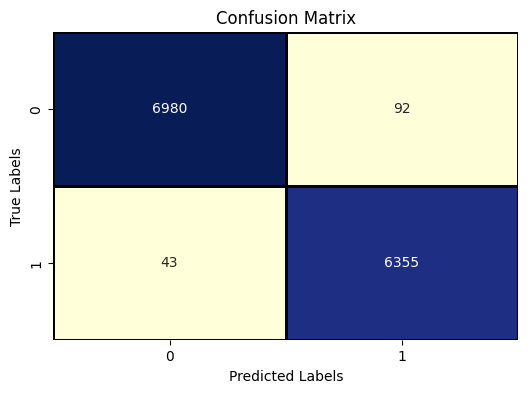

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', cbar=False, linecolor='black', linewidth=1)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [80]:
from sklearn.naive_bayes import MultinomialNB 

classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_pred, y_test)
test_accuracy

0.9333333333333333

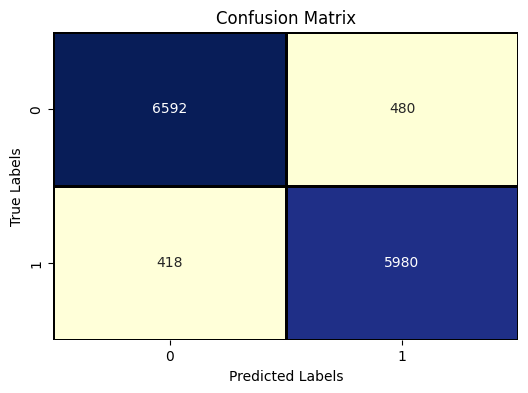

In [81]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', cbar=False, linecolor='black', linewidth=1)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [82]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(alpha=0.1)
classifier.fit(X_train, y_train) 

# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_pred, y_test)
test_accuracy

0.525018559762435

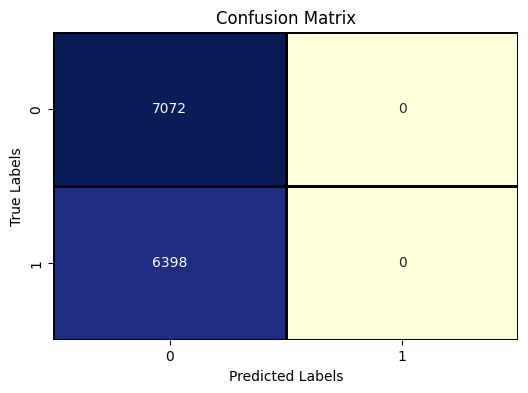

In [83]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', cbar=False, linecolor='black', linewidth=1)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))#, target_names=labels))

              precision    recall  f1-score   support

        fake       0.53      1.00      0.69      7072
        true       0.00      0.00      0.00      6398

    accuracy                           0.53     13470
   macro avg       0.26      0.50      0.34     13470
weighted avg       0.28      0.53      0.36     13470



In [85]:
#esercizio finito ma dobbiamo fare la pipeline
# Step 8: Pipeline Finale (nuovo train test split su dati raw tetuali)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )


from sklearn.pipeline import Pipeline

bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
tfidf = TfidfTransformer()
#clf = MultinomialNB(alpha=0.1)
clf = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
#clf =SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)

pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9841870824053452


In [86]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        fake       0.99      0.98      0.98      7072
        true       0.98      0.99      0.98      6398

    accuracy                           0.98     13470
   macro avg       0.98      0.98      0.98     13470
weighted avg       0.98      0.98      0.98     13470



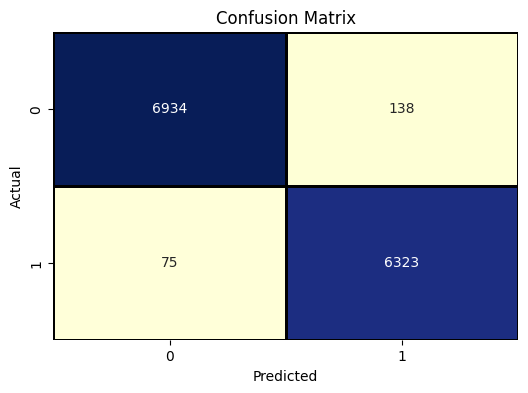

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', cbar=False, linecolor='black', linewidth=1)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix')
plt.show()

In [90]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, scoring = 'f1_micro', cv = 5)

print(f'scores={scores}')
print(f'mean={np.mean(scores)}')
print(f'std={np.std(scores)}')

scores=[0.98184855 0.9863029  0.98652561 0.98563314 0.98574451]
mean=0.9852109438231398
std=0.0017140209684129227


In [91]:

joblib.dump(pipe,'true_fake.pkl')

['true_fake.pkl']

In [93]:

uploaded_model = joblib.load('true_fake.pkl')


In [98]:
pred = uploaded_model.predict(["senator"])
pred[0]

'fake'